In [1]:
print('Hello again')

Hello again


In [2]:
print('Inserting cell below is B')

Inserting cell below is B


In [3]:
print('Cool')

Cool


# Markdown Heading

Let's make some _stuff_!

In [4]:
!ls

01_python_intro_v2.ipynb  genderclassmodel.py  ivTitanic.ipynb	 train.csv
descr.txt		  gendermodel.csv      myfirstforest.py
genderclassmodel.csv	  gendermodel.py       test.csv


### Importing some libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%pylab inline
print('Imported!')

Populating the interactive namespace from numpy and matplotlib
Imported!


In [6]:
train = pd.read_csv('train.csv')
testing  = pd.read_csv('test.csv')

In [7]:
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
!ls
testing = pd.read_csv("test.csv")
gender_model = pd.read_csv("gendermodel.csv")
gender_class_model = pd.read_csv("genderclassmodel.csv")

01_python_intro_v2.ipynb  genderclassmodel.py  ivTitanic.ipynb	 train.csv
descr.txt		  gendermodel.csv      myfirstforest.py
genderclassmodel.csv	  gendermodel.py       test.csv


In [9]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
type(list(train['Embarked'].unique())[3])

float

In [13]:
train.drop('Name', axis = 1, inplace = True)

In [14]:
train.drop('Ticket', axis = 1, inplace = True)

In [15]:
def iv_fill_empty_str_values(data_frame, column_name):
    values = list(data_frame[column_name].unique())
    values = [x for x in values if type(x) == str]
    fill_template = 'Empty'
    fill = fill_template
    count = 0
    while fill in values:
        count += 1
        fill = fill_template + '_' + str(count)   
    def fill_data(row, column_name, values, fill):
        if not row[column_name] in values:
            return fill
        return row[column_name]
    
    data_frame[column_name] = data_frame.apply(lambda row: fill_data(row, column_name, values, fill), axis = 1)
    return data_frame

In [16]:
iv_fill_empty_str_values(train, "Embarked")
train["Embarked"].unique()
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,7.2500,NaN,S
1,2,1,1,female,38,1,0,71.2833,C85,C
2,3,1,3,female,26,0,0,7.9250,NaN,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,35,0,0,8.0500,NaN,S


In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
for c in ['Embarked', 'Sex']:
    train[c] = lbl_enc.fit_transform(train[c])
    testing[c] = lbl_enc.transform(testing[c])
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22,1,0,7.2500,NaN,3
1,2,1,1,0,38,1,0,71.2833,C85,0
2,3,1,3,0,26,0,0,7.9250,NaN,3
3,4,1,1,0,35,1,0,53.1000,C123,3
4,5,0,3,1,35,0,0,8.0500,NaN,3


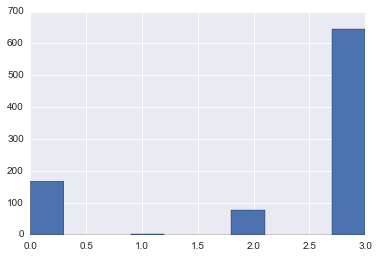

In [18]:
train["Embarked"].hist()

## Обучаем алгоритмы и создаем кроссвалидацию

In [19]:
training_list = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(train[training_list].fillna(-1), train["Survived"])
prediction = bagging.predict(testing[training_list].fillna(-1))

### Кросс-валидируем KNN

In [20]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

folds = 20
average_score = 0
skf = cross_validation.StratifiedKFold(train["Survived"], n_folds = folds)

X = train[training_list]
y = train["Survived"]
for train_index, test_index in skf:
    bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
    y_train = y[train_index]
    y_test  = y[test_index]
    X_train = X.loc[train_index, :].fillna(-1)
    X_test  = X.loc[test_index, :].fillna(-1)
    bagging.fit(X_train, y_train)
    prediction = bagging.predict(X_test[X_test.columns])
    score = accuracy_score(y_test, prediction)
    average_score += score
average_score /= folds
print(average_score)

0.756660079051


In [21]:
from sklearn import metrics
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
scores = cross_validation.cross_val_score(bagging, X.fillna(-1), y.fillna(-1), folds)

TypeError: 'int' object is not callable

In [ ]:
X_test = X.loc[[1, 3], :]
print(X_test)